# **Clustering**
---
Consiste en agrupar automáticamente los datos de conjuntos de manera que los elementos
dentro de un mismo grupo sean similares entre sí y diferentes de los otros grupos (clusters).
Para entenderlo mejor consiste en que al graficar unas imágenes en un espacio de N dimensiones,
siendo N el número de características, agrupa las imágenes que estén muy cerca y formen grupos
de imágenes porque probablemente sean de lo mismo.
Ejemplos: grupos de fotos de gatos, de aviones, de coches, de batidoras, etc.
El algoritmo que vamos a usar para que el sistema descubra esos grupos va a ser K-means que
divide los datos en K grupos según la distancia entre puntos. Es muy simple y rápido.

**¿Cómo funciona K-means?**
- 1º. K-means define K centroides de forma aleatoria que serán los centros de los grupos.
- 2º. Para cada punto de datos (cada imagen) calcula la distancia entre ese punto y cada centroide y asigna a ese punto el grupo del centroide más cercano. Estos son los grupos temporales.
- 3º. Se recalcula la posición del centroide de cada grupo (la media) de todos los puntos de dicho grupo.
- 4º. Se repiten los pasos 2º y 3º hasta que los centroides ya no cambien significativamente o se alcanze el número máximo de iteraciones.
- 5º. Finalmente tendremos K grupos definidos cada uno con su centroide y cada punto de datos (imagen) asignado a un único grupo.

# Dataset de Características
---

In [1]:
import cv2, glob, os, numpy as np, tensorflow as tf

2025-10-14 10:38:27.321989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760438307.480607      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760438307.528211      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#Sacamos el path
path = '/kaggle/input/face-expression-recognition-dataset/images/validation/'

In [3]:
#Sacamos una lista de todos los paths
folders = os.listdir(path)

In [4]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential

In [5]:
base_model = tf.keras.applications.resnet.ResNet101(
    include_top = False,
    weights = 'imagenet',
    input_shape = (224, 224, 3)
)

I0000 00:00:1760438319.436272      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1760438319.437021      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [9]:
#Definimos el modelo
model = Sequential()
model.add(base_model)
model.add(Flatten())

In [6]:
def get_convfeatures(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    return model.predict(np.array([img]))

In [7]:
features = []
names = []

In [ ]:
for folder in folders:
    for filename in glob.glob(path + folder + '/*.jpg'):
        names.append(filename)
        features.append(get_convfeatures(filename))

I0000 00:00:1760439129.706994      98 service.cc:148] XLA service 0x78e35808a270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760439129.707761      98 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760439129.707781      98 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760439130.899242      98 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


I0000 00:00:1760439133.771156      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━

In [11]:
#Los transformamos a un array de numpy
features = np.array(features)
names = np.array(names)

In [13]:
#Transformamos las características a una tablita de 2x2 porque antes tenía esta forma (7066, 1, 100352)
features = features[:, 0, :]

# K-means

In [14]:
from nltk.cluster.kmeans import KMeansClusterer
from nltk.cluster.util import cosine_distance

In [15]:
#Definimos la cantidad de centros (igual al número de clases)
#Calculamos la distancia con distancia coseno
kmeans = KMeansClusterer(7, distance = cosine_distance)

In [16]:
#Con esto hace el entrenamiento de estos clusters
cluster = kmeans.cluster(features, assign_clusters = True)

In [17]:
#Al poner esto muestra para todas las imágenes analizadas a que cluster pertenecen
cluster

[5,
 2,
 2,
 3,
 5,
 6,
 3,
 1,
 6,
 5,
 5,
 3,
 3,
 6,
 5,
 3,
 3,
 6,
 3,
 3,
 1,
 3,
 2,
 5,
 4,
 5,
 3,
 3,
 2,
 6,
 2,
 2,
 1,
 2,
 6,
 1,
 0,
 5,
 3,
 5,
 3,
 0,
 6,
 6,
 5,
 1,
 3,
 6,
 5,
 0,
 3,
 6,
 3,
 2,
 1,
 4,
 0,
 2,
 6,
 2,
 3,
 6,
 2,
 4,
 4,
 1,
 6,
 3,
 6,
 3,
 3,
 2,
 2,
 4,
 5,
 1,
 3,
 5,
 4,
 6,
 2,
 3,
 1,
 3,
 4,
 3,
 2,
 2,
 3,
 5,
 6,
 5,
 6,
 4,
 5,
 4,
 2,
 2,
 1,
 6,
 3,
 2,
 3,
 1,
 3,
 3,
 0,
 5,
 1,
 0,
 3,
 3,
 2,
 1,
 0,
 5,
 5,
 2,
 3,
 2,
 2,
 1,
 3,
 6,
 1,
 1,
 4,
 1,
 6,
 3,
 3,
 3,
 6,
 3,
 3,
 3,
 3,
 2,
 4,
 5,
 0,
 2,
 3,
 5,
 4,
 2,
 1,
 2,
 6,
 6,
 3,
 4,
 4,
 2,
 5,
 3,
 3,
 6,
 6,
 3,
 0,
 3,
 6,
 2,
 6,
 0,
 6,
 6,
 4,
 4,
 6,
 4,
 2,
 5,
 4,
 4,
 2,
 3,
 3,
 5,
 3,
 6,
 3,
 0,
 2,
 5,
 3,
 4,
 5,
 0,
 4,
 1,
 3,
 3,
 4,
 3,
 6,
 5,
 6,
 5,
 2,
 3,
 6,
 2,
 5,
 4,
 3,
 2,
 4,
 3,
 2,
 5,
 3,
 6,
 0,
 6,
 3,
 5,
 6,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 6,
 5,
 6,
 2,
 5,
 1,
 5,
 2,
 4,
 6,
 3,
 3,
 5,
 6,
 3,
 3,
 3,
 2,
 3,
 3,
 6,
 3,
 3,


In [18]:
#Con esto muestra los centroides para cada cluster, cada centroide es un vector numérico
kmeans.means()

[array([0.00462378, 0.00216864, 0.01292538, ..., 0.04019409, 0.20884587,
        0.2998816 ], dtype=float32),
 array([0.00266621, 0.        , 0.03648753, ..., 0.04987309, 0.43778273,
        0.23117636], dtype=float32),
 array([0.        , 0.        , 0.0324917 , ..., 0.02639465, 0.96343696,
        0.42154142], dtype=float32),
 array([0.00517607, 0.02141796, 0.00865832, ..., 0.1335479 , 0.16027333,
        0.06220993], dtype=float32),
 array([0.00122447, 0.        , 0.00596143, ..., 0.0172748 , 0.3775093 ,
        0.26132977], dtype=float32),
 array([0.00713171, 0.00331629, 0.01781433, ..., 0.03438319, 0.2459188 ,
        0.13004436], dtype=float32),
 array([0.00524798, 0.00049282, 0.01118833, ..., 0.05189377, 0.2729665 ,
        0.13947651], dtype=float32)]

In [21]:
group_images = []
#Recorremos todos los centroides, iteramos sobre cada cluster
for centroid in kmeans.means():
    #Para cada centroide calcula la distancia coseno entre ese centroide y cada vector de características
    #Se produce una lista dist con tantas distancias como elementos haya en features (una para cada imagen)
    dist = [cosine_distance(centroid, feature) for feature in features]
    #Lo transformamos a numpy array
    dist = np.array(dist)
    #Sacamos cuales son los index de las menores distancias a los centroides
    min_index = dist.argsort()[:5] #Muestra los primeros 5
    group_images.append(names[min_index]) #Añade al grupo de imágenes los nombres de las imágenes con las menores distancias

In [22]:
group_images

[array(['/kaggle/input/face-expression-recognition-dataset/images/validation/neutral/7254.jpg',
        '/kaggle/input/face-expression-recognition-dataset/images/validation/happy/7392.jpg',
        '/kaggle/input/face-expression-recognition-dataset/images/validation/happy/7335.jpg',
        '/kaggle/input/face-expression-recognition-dataset/images/validation/happy/30.jpg',
        '/kaggle/input/face-expression-recognition-dataset/images/validation/neutral/3929.jpg'],
       dtype='<U86'),
 array(['/kaggle/input/face-expression-recognition-dataset/images/validation/fear/26363.jpg',
        '/kaggle/input/face-expression-recognition-dataset/images/validation/sad/26404.jpg',
        '/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/9309.jpg',
        '/kaggle/input/face-expression-recognition-dataset/images/validation/neutral/18312.jpg',
        '/kaggle/input/face-expression-recognition-dataset/images/validation/neutral/13409.jpg'],
       dtype='<U86'),
 arr

In [23]:
import matplotlib.pyplot as plt

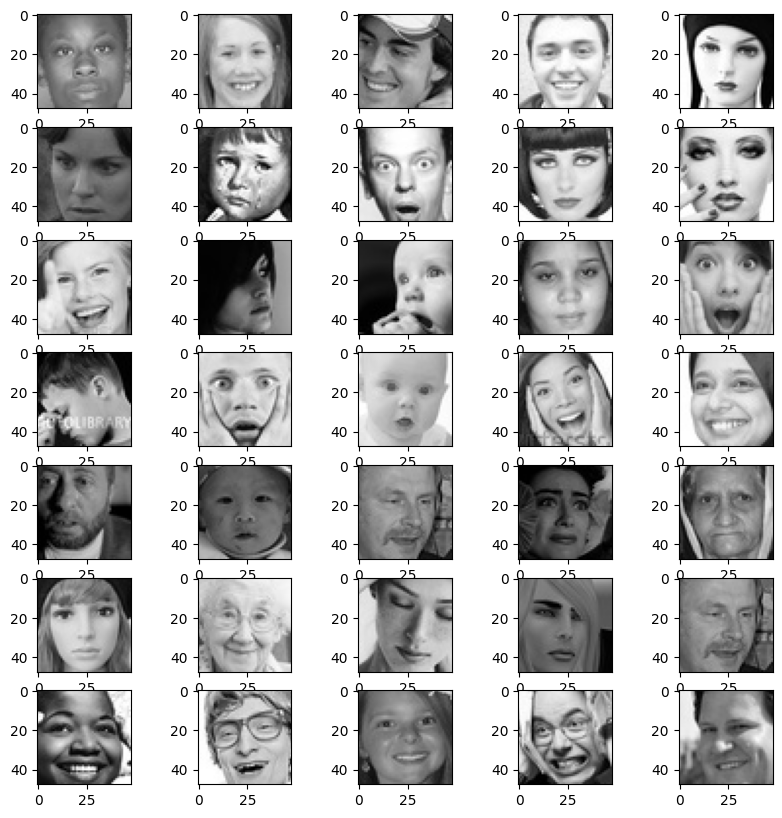

In [25]:
#Hacemos más grandes las imágenes en el gráfico
plt.rcParams["figure.figsize"] = (10, 10)
#Creamos una matriz de imágenes donde cada fila representa un cluster y cada columna representa una imagen cercana a su centroide
_, axarr = plt.subplots(len(group_images), len(group_images[0]))
#Recorremos el grupo de imágenes y las mostramos, cada fila de imágenes muestra las 5 imágenes más similares de un cluster
for i, cluster in enumerate(group_images):
    for j, path_image in enumerate(cluster):
        img = cv2.imread(path_image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axarr[i, j].imshow(img)